In [1]:
pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
!git clone https://github.com/ultralytics/ultralytics.git

In [6]:
cd ultralytics

/home_nfs/najemr/ultralytics


In [3]:
pip install importlib.metadata

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
cat ./dataset.yaml

names:
- smoke
- fire
path: /home_nfs/najemr/yolov5/fire_detection_dataset/D-Fire
test: images/test
train: images/train
val: images/valid


In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch

/home_nfs/najemr/.local/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Charger le modèle YOLOv8 pré-entraîné

In [3]:
model = YOLO('yolov8s.pt') 

# Débuter l'entraînement

In [7]:
model.train(data='./dataset.yaml', epochs=5, imgsz=224)

Ultralytics YOLOv8.0.145 🚀 Python-3.7.11 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=./dataset.yaml, epochs=5, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, form

# Évaluation

In [8]:
model.val()

Ultralytics YOLOv8.0.145 🚀 Python-3.7.11 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients
val: Scanning /home_nfs/najemr/yolov5/fire_detection_dataset/D-Fire/labels/valid.cache... 3445 images, 1575 backgrounds, 0 corrupt: 100%|██████████| 3445/3445 [00:00<?, ?it/s]
/home_nfs/najemr/.local/lib/python3.7/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 216/216 [00:43<00:00,  4.96it/s]
                   all       3445       4

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f50cb604850>
fitness: 0.2801552372017571
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.32004,     0.18937])
names: {0: 'smoke', 1: 'fire'}
plot: True
results_dict: {'metrics/precision(B)': 0.5877057532107932, 'metrics/recall(B)': 0.4809808981244985, 'metrics/mAP50(B)': 0.5091822164331539, 'metrics/mAP50-95(B)': 0.25470779506493524, 'fitness': 0.2801552372017571}
save_dir: PosixPath('runs/detect/val5')
speed: {'preprocess': 0.04211987743183905, 'inference': 1.9782783331130513, 'loss': 0.0010374841565490634, 'postprocess': 2.161430516678986}

# Prédictions sur une nouvelle image


image 1/1 /home_nfs/najemr/ultralytics/../Dataset/Dataset/FIRE_DATABASE_1/FIRE_DATABASE_1/fire/00000000.jpg: 128x224 2 smokes, 2 fires, 14.3ms
Speed: 18.7ms preprocess, 14.3ms inference, 1.9ms postprocess per image at shape (1, 3, 128, 224)


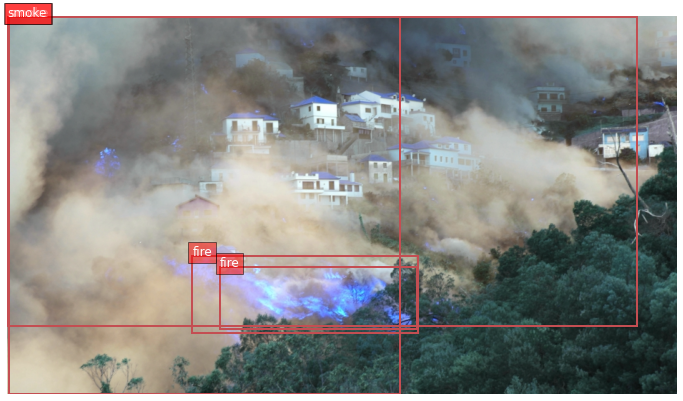

In [28]:
# Predict the image and get the results
results = model.predict(source='../Dataset/Dataset/FIRE_DATABASE_1/FIRE_DATABASE_1/fire/00000000.jpg')

# Extract the original image
orig_img = results[0].orig_img

# Create a matplotlib figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))

# Display the image
ax.imshow(orig_img)

# Get the boxes attribute
boxes = results[0].boxes

# Loop through the detected boxes and add them to the plot
for box in boxes:
    # Move the box coordinates to CPU and convert to numpy
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
    width, height = x2 - x1, y2 - y1
    
    # Create a rectangle patch
    rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)
    
    # Add a label (optional)
    label = results[0].names[int(box.cls)]
    plt.text(x1, y1, label, color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

# Show the plot
plt.axis('off')  # Hide axes ticks
plt.show()


# Sauvegarder le modèle

In [ ]:
model.save('./saved_model.pt')